In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import scipy.io as sio
import time

## Feature Visualization
The feature visualization code is in the "feature_visualiztion_code" folder

## Data preprocessing

In [7]:
# Data processing
#Read data
labels = sio.loadmat('./Salinas_gt.mat')['salinas_gt']
features = sio.loadmat( './Salinas_corrected.mat')['salinas_corrected']

#reshape the matrix
labels= np.reshape(labels,(512*217,1))
features= np.reshape(features,(512*217,204))

#Dlete the background points
X = np.delete(features, np.where(labels == 0), axis = 0)
y = np.delete(labels, np.where(labels == 0),axis = 0)

#PCA reduces dimensions
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
pca = PCA(n_components=15)
pca.fit(X)
X = pca.transform(X)

X_shuffled, y_shuffled = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Save the data for consistency
X_dict = {"X": X}
y_dict = {"y": y}
X_train_dict = {"X_train": X_train}
y_train_dict = {"y_train": y_train}
X_test_dict = {"X_test": X_test}
y_test_dict = {"y_test": y_test}

sio.savemat("./data/X.mat", X_dict)
sio.savemat("./data/y.mat",y_dict)
sio.savemat("./data/X_train.mat", X_train_dict)
sio.savemat("./data/y_train.mat", y_train_dict)
sio.savemat("./data/X_test.mat", X_test_dict)
sio.savemat("./data/y_test.mat", y_test_dict)

### Read data

In [8]:
X_train= sio.loadmat('./data/X_train.mat')['X_train']
y_train= sio.loadmat('./data/y_train.mat')['y_train']
X_test= sio.loadmat('./data/X_test.mat')['X_test']
y_test= sio.loadmat('./data/y_test.mat')['y_test']
X = sio.loadmat("./data/X.mat")["X"]
y = sio.loadmat("./data/y.mat")["y"]

## 1. Naive_Bayes

In [9]:
# test get_class_info
from naive_bayes.naive_bayes import *

class_info = get_class_info(X_train, y_train)

start_time = time.time()
class_info = get_class_info(X_train,y_train)
end_time =  time.time()
train_time= end_time-start_time
print("Naive bayes train time: ",train_time)

start_time = time.time()
test_result = predict(class_info, X_test,y_train)
end_time = time.time()
test_time= end_time-start_time
print("Naive bayes test time: ",test_time)


test_accuracy = accuracy_score(y_test, test_result)
test_recall = recall_score
print("Naive bayes accuracy:")
print(test_accuracy)
print("The predict labels are:")
print(test_result)

Naive bayes train time:  0.09256315231323242
Naive bayes test time:  0.03394508361816406
Naive bayes accuracy:
0.8759467947533716
The predict labels are:
[ 6 10 10 ...  9  2  8]


## 2. SVM

In [51]:
from sklearn import svm

In [ ]:
model = svm.SVC(C=10, kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 3. KNN

In [23]:
from knn.knn import *

knn_prediction = KNN_KDTree(X_train, X_test, y_train, 7)

## 4. Random Forest

In [10]:
from random_forest.random_forest import *
y_train = y_train.reshape(-1)

In [11]:
rf = RandomForest(10, 5, 4, criterion='gini')
rf.fit(X_train[:8000], y_train[:8000])
rf_predictions = rf.predict(X_test)


Trees: 0 started.
Trees: 0 finished.

Trees: 1 started.
Trees: 1 finished.

Trees: 2 started.
Trees: 2 finished.

Trees: 3 started.
Trees: 3 finished.

Trees: 4 started.
Trees: 4 finished.

Trees: 5 started.
Trees: 5 finished.

Trees: 6 started.
Trees: 6 finished.

Trees: 7 started.
Trees: 7 finished.

Trees: 8 started.
Trees: 8 finished.

Trees: 9 started.
Trees: 9 finished.



In [12]:
start_time = time.time()
test_result = rf.predict(X_test)
end_time = time.time()
test_time = end_time - start_time
print("Random Forest test time:",test_time)

test_accuracy = accuracy_score(y_test, test_result)
print("Random Forest accuracy:", test_accuracy)


Random Forest test time: 0.39216184616088867
Random Forest accuracy: 0.7997413633844449


## Classification Map code
An example of Naive Bayes model, other models use the same code to load the predict image

In [10]:
result = predict(class_info, X,y_train) ## get the prediction result by Bayes classifier
# uncomment to run
# result = KNN_KDTree(X_train, X, y_train, 7)
# result = rf.predict(X)
# result = model.predict(X)
n = -1
for i in range(len(labels)):
    if (labels[i] != 0):
        n = n+1
        labels[i] = result[n]
labels = labels.reshape(512,217)

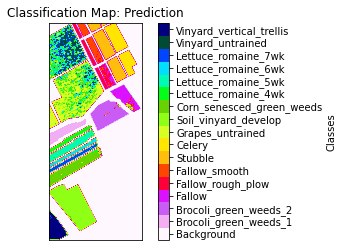

In [11]:
NUM_CLASSES = 16
GROUND_TRUTH = ['Background', 'Brocoli_green_weeds_1', 'Brocoli_green_weeds_2', 'Fallow', 'Fallow_rough_plow',
                        'Fallow_smooth', 'Stubble', 'Celery', 'Grapes_untrained', 'Soil_vinyard_develop',
                        'Corn_senesced_green_weeds', 'Lettuce_romaine_4wk', 'Lettuce_romaine_5wk',
                        'Lettuce_romaine_6wk', 'Lettuce_romaine_7wk', 'Vinyard_untrained', 'Vinyard_vertical_trellis']
def display_class(data, title=''):
    # this function is from "LEt_SNE_ICASSP2020.ipynb" in "https://github.com/meghshukla/LEt-SNE"
    '''
    NUMPY
    Displays Classification Map
    :param data: 2D Numpy array containing pixel wise labels
    :return: None
    '''
    fig, ax = plt.subplots()

    plt.imshow(data, cmap=plt.cm.get_cmap('gist_ncar_r', NUM_CLASSES + 1))
    plt.title('Classification Map: ' + title)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(label='Classes', boundaries=(np.arange(NUM_CLASSES + 2) - 0.5))
    cbar.set_ticks(np.arange(NUM_CLASSES + 1))
    cbar.set_ticklabels(GROUND_TRUTH)

    return None
display_class(labels, 'Prediction')

## Cross validation code

In [12]:
X_shuffled, y_shuffled = shuffle(X, y)
k = 3
num_validation_samples = len(X_shuffled) // k


validation_scores = []
for fold in range(k):
    test_data_X = X_shuffled[num_validation_samples*fold:num_validation_samples*(fold+1)]
    training_data_X = np.append(X_shuffled[:num_validation_samples*fold,:], X_shuffled[num_validation_samples*(fold+1):,:], axis=0)
    
    test_data_y = y_shuffled[num_validation_samples*fold:num_validation_samples*(fold+1)]
    training_data_y = np.append(y_shuffled[:num_validation_samples*fold,:], y_shuffled[num_validation_samples*(fold+1):,:], axis=0)

    # Naive Bayes
    class_info = get_class_info(training_data_X,training_data_y)
    Bayes_predictions = predict(class_info, test_data_X, test_data_y)    
    validation_score = accuracy_score(test_data_y, Bayes_predictions)
    
    
#     uncomment to run
#     # SVM
#     model = svm.SVC()
#     model.fit(training_data_X,training_data_y)
#     SVM_predictions = model.predict(test_data_X)
#     validation_score = accuracy_score(test_data_y, SVM_predictions)
     
#     uncomment to run
#     # KNN
#     KNN_predictions = KNN_KDTree(training_data_X, test_data_X, training_data_y, 10)
#     validation_score = accuracy_score(test_data_y, KNN_predictions)
    
#     uncomment to run
#     # Random Forest
#     rf = RandomForest(10, 5, 4, criterion='gini')
#     training_data_y = training_data_y.reshape(-1)
#     rf.fit(training_data_X, training_data_y)
#     RandomForest_predictions = rf.predict(test_data_X)
#     validation_score = accuracy_score(test_data_y, RandomForest_predictions)


    validation_scores.append(validation_score)
    
validation_score = np.average(validation_scores)
print("The average accuracy gained by k-fold cross validation is: ", validation_score)

The average accuracy gained by k-fold cross validation is:  0.8813390234439948
